# Comprehensive Analysis of Oil Prices using VAR, LSTM, and Markov-Switching Models

## Introduction
This analysis investigates how major economic indicators and market conditions impact oil prices using a range of models: VAR, LSTM, and Markov-Switching.

## Step 1: Data Loading and Preprocessing


In [1]:
import pandas as pd
import datetime
import wbdata
import sys, os
import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
data = pd.read_csv('additional_economic_indicators.csv', parse_dates=['Date'])

## Step 2: VAR Model
Train a VAR model, generate forecasts, and compute Impulse Response Functions (IRFs) using the `var_model` module.


In [4]:
from var_model import train_var_model, forecast_var, impulse_response, save_var_model
var_model = train_var_model(data[['Price', 'GDP', 'Inflation', 'Unemployment']], lags=1)

2024-11-05 22:11:48,325 - INFO - VAR model trained with lags=1


2024-11-05 22:11:48,345 - INFO - Forecasted 10 steps using VAR model
2024-11-05 22:11:48,345 - INFO - Impulse response function computed for 10 steps


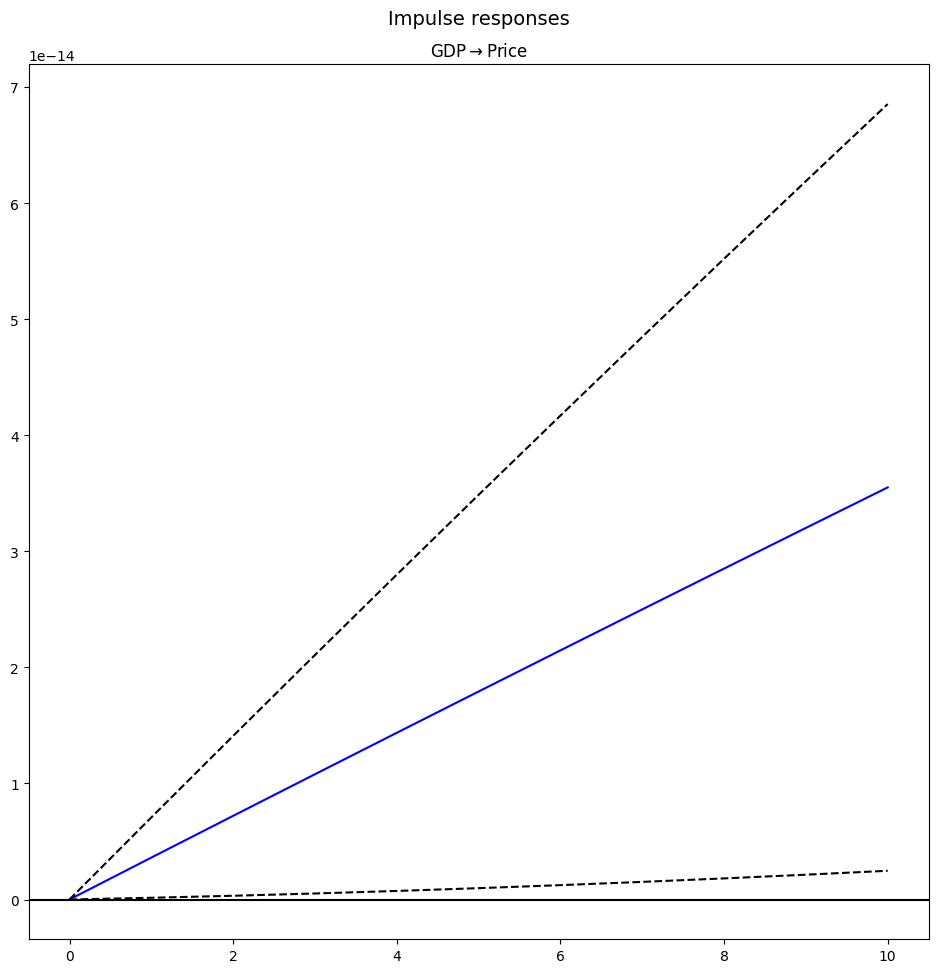

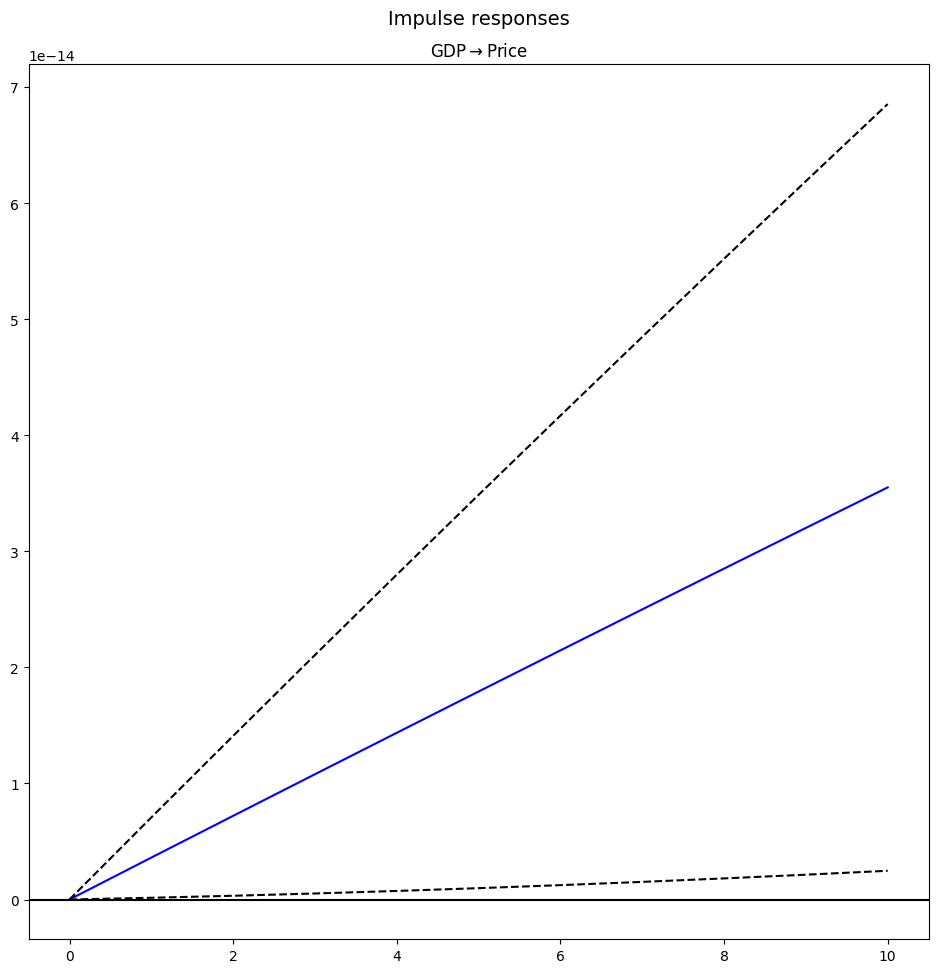

In [5]:
forecast = forecast_var(var_model, steps=10)
impulse_response(var_model, impulse='GDP', response='Price', steps=10)


In [6]:
save_var_model(var_model)

2024-11-05 22:11:49,351 - INFO - VAR model saved to var_model.pkl


## Step 3: LSTM Model
Next, we will define and train an LSTM model to capture non-linear relationships in the data.

Prepare Data for LSTM
We need to reshape our data for the LSTM model, which requires a 3D input format.

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Price']])

# Preparing the dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10  # Number of previous time steps to consider
X, y = create_dataset(scaled_data, time_step)

# Reshaping input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

Train the LSTM Model
Now we will define and train our LSTM model.

In [8]:
from lstm_model import create_lstm_model, train_lstm_model, save_lstm_model

# Create LSTM model
lstm_model = create_lstm_model(input_shape=(X.shape[1], 1))

# Train LSTM model
trained_lstm_model, history = train_lstm_model(lstm_model, X, y, epochs=20, batch_size=32)

# Save the trained LSTM model
save_lstm_model(trained_lstm_model)


2024-11-05 22:11:54,141 - INFO - LSTM model created


Epoch 1/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0181
Epoch 2/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0020
Epoch 3/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0018
Epoch 4/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0015
Epoch 5/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0014
Epoch 6/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0014
Epoch 7/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0014
Epoch 8/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0012
Epoch 9/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0012
Epoch 10/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 8.9920e-04
Epoch 11/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9.9320e-04
Epoch 12/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 8.5323e-04
Epoch 13/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0011
Epoch 14/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.8701e-04
Epoch 15/20
253/253 ━━━━━━━━━━━━

2024-11-05 22:12:49,645 - INFO - LSTM model trained for 20 epochs
2024-11-05 22:12:49,724 - INFO - lstm model saved to lstm_model.pkl


## Step 4: Markov-Switching Model
In this step, we will train the Markov-Switching model for regime interpretation, allowing us to analyze how different market regimes affect oil prices.

Train the Markov-Switching Model
We will train the model with the specified number of regimes.

In [10]:
from markov_switching import train_markov_switching, save_markov_model

# Train Markov-Switching model
markov_model = train_markov_switching(data[['Price']], k_regimes=2)

# Save the trained Markov-Switching model
save_markov_model(markov_model)


2024-11-05 22:13:09,523 - INFO - Markov-Switching model trained with 2 regimes
2024-11-05 22:13:09,535 - INFO - Markov model saved to markov_model.pkl


## Step 5: LSTM Model Evaluation
Next, we will evaluate the LSTM model's performance.

In [14]:
from evaluation import evaluate_forecast, plot_forecast

In [ ]:
# LSTM Predictions

lstm_predictions = trained_lstm_model.predict(X)

# Inverse scaling for predictions
lstm_predictions_inv = scaler.inverse_transform(lstm_predictions)

# Evaluate LSTM model
y_true_lstm = scaler.inverse_transform(y.reshape(-1, 1))[-len(lstm_predictions_inv):]
rmse_lstm, mae_lstm = evaluate_forecast(y_true_lstm, lstm_predictions_inv)
print(f"LSTM Model - RMSE: {rmse_lstm}, MAE: {mae_lstm}")


253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


2024-11-05 22:15:02,414 - INFO - Forecast evaluation - RMSE: 2.337962134263051, MAE: 1.1650116717028547


LSTM Model - RMSE: 2.337962134263051, MAE: 1.1650116717028547
